# K Nearest Neighbor Classification

1. Read the data (both train and test)
2. Split the  x and y variables from train and test
3. Try to see how the data looks like by writing one record to csv
4. Looking at 5 samples from train and test
5. Build knn model with k = 3. Check the model performance
6. Look at the sample misclassified points
7. Use grid search for model building and check the model performance

In [1]:
import numpy as np    # For array operations
import pandas as pd   # For DataFrames
import matplotlib.pyplot as plt    # For plotting
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,mean_squared_error,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#### 1. Read the data (both train and test)

In [2]:
train = pd.read_csv('train_sample.csv')
test = pd.read_csv('test_sample.csv')

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 2. Split the x and y from train and test

In [3]:
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]

print(X_train.shape)
print(y_train.shape)

(5000, 784)
(5000,)


In [4]:
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]

print(X_test.shape)
print(y_test.shape)

(1000, 784)
(1000,)


#### 3.  Try to visually look at the data by writing one of the records to csv

In [5]:
x1 = X_train.iloc[0,:].values.reshape(28,28)
x1[x1 > 0] = 1
x1 = pd.DataFrame(x1)
x1.to_csv("one.csv")

#### 4. Look at 5 sample records from train and test

In [6]:
train_sample = np.random.choice(range(0,X_train.shape[0]),replace=False,size=5)
test_sample = np.random.choice(range(0,X_test.shape[0]),replace=False,size=5)

In [7]:
train_sample

array([3548, 1519, 3371,  617, 4872])

In [8]:
test_sample

array([ 72, 212, 409, 613, 993])

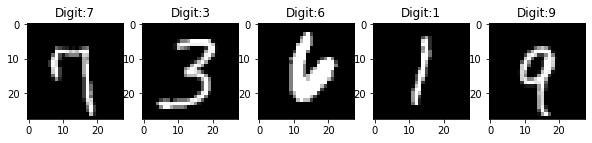

In [9]:
plt.figure(figsize=(10,5))
for i,j in enumerate(train_sample):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train.iloc[j,:].values.reshape(28,28))
    plt.title("Digit:"+str(y_train[j]))
    plt.gray()

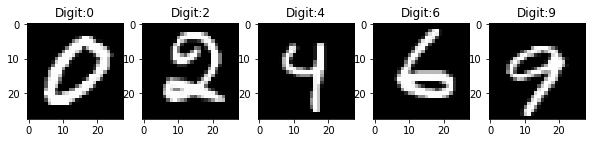

In [10]:
plt.figure(figsize=(10,5))
for i,j in enumerate(test_sample):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test.iloc[j,:].values.reshape(28,28))
    plt.title("Digit:"+str(y_test[j]))
    plt.gray()

#### 5. Build knn model with k = 3. Check the model performance

In [11]:
knn_classifier = KNeighborsClassifier(n_neighbors=3,weights="distance",algorithm="brute")
knn_classifier.fit(X_train, y_train)
pred_train = knn_classifier.predict(X_train) 
pred_test = knn_classifier.predict(X_test)

Build confusion matrix and find the accuracy of the model

In [12]:
cm_test = confusion_matrix(y_pred=pred_test, y_true=y_test)
print(cm_test.shape)
print(cm_test)
print(accuracy_score(pred_test,y_test))
print(classification_report(y_test,pred_test))

(10, 10)
[[ 98   0   0   0   0   0   2   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0]
 [  1   2  96   0   0   0   0   1   0   0]
 [  0   0   1  88   0   3   1   3   1   3]
 [  0   2   0   0  89   0   0   1   0   8]
 [  0   1   0   3   0  93   2   0   1   0]
 [  0   0   0   0   0   2  98   0   0   0]
 [  0   2   0   0   0   0   0  95   0   3]
 [  1   0   2   2   0   3   0   1  90   1]
 [  0   0   0   0   2   0   0   4   0  94]]
0.941
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       100
           1       0.93      1.00      0.97       100
           2       0.97      0.96      0.96       100
           3       0.95      0.88      0.91       100
           4       0.98      0.89      0.93       100
           5       0.92      0.93      0.93       100
           6       0.95      0.98      0.97       100
           7       0.90      0.95      0.93       100
           8       0.98      0.90      0.94       100
           9 

In [13]:
# Accuracy: 

sum(np.diag(cm_test))/np.sum(cm_test)

# np.trace(cm_test)/np.sum(cm_test)

0.941

In [14]:
print("Accuracy on train is:",accuracy_score(y_train,pred_train))
print("Accuracy on test is:",accuracy_score(y_test,pred_test))

Accuracy on train is: 1.0
Accuracy on test is: 0.941


#### 6. Look at the sample misclassified points

In [15]:
misclassified = y_test[pred_test != y_test] 

In [16]:
## First 5 misclassified points
misclassified.index[:5]

Int64Index([83, 97, 224, 246, 286], dtype='int64')

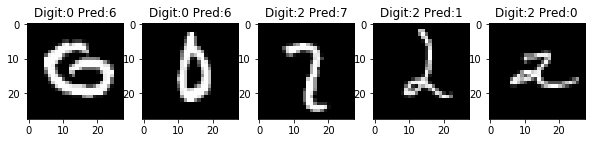

In [17]:
plt.figure(figsize=(10,5))
for i,j in enumerate(misclassified.index[:5]):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test.iloc[j,:].values.reshape(28,28))
    plt.title("Digit:"+str(y_test[j])+" "+"Pred:"+str(pred_test[j]))
    plt.gray()

#### 7. Use grid search for model building and check the model performance

In [21]:
knn_classifier = KNeighborsClassifier()

In [24]:
params = {"n_neighbors": [1,3,5,7],"metric": ["euclidean", "cityblock","minkowski"],"weights":["distance","uniform"],"algorithm":["brute","ball_tree", "kd_tree"]}
#params = {"n_neighbors": [1],"metric": ["euclidean", "cityblock"]}

grid = GridSearchCV(knn_classifier,param_grid=params,scoring="accuracy",cv=10)

In [25]:
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.938
{'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}


In [26]:
print(grid.best_estimator_)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')


In [27]:
best_knn = grid.best_estimator_
pred_train = best_knn.predict(X_train) 
pred_test = best_knn.predict(X_test)
print("Accuracy on train is:",accuracy_score(y_train,pred_train))
print("Accuracy on test is:",accuracy_score(y_test,pred_test))

Accuracy on train is: 1.0
Accuracy on test is: 0.943


In [ ]:
# try To do more accurate with playing with hyper parameter

In [28]:
knn_classifier= KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train,y_train)
pred_train = knn_classifier.predict(X_train) 
pred_test = knn_classifier.predict(X_test)

In [29]:
print(classification_report(pred_test,y_test))
print(accuracy_score(pred_test,y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        98
           1       1.00      0.89      0.94       112
           2       0.95      0.98      0.96        97
           3       0.92      0.95      0.93        97
           4       0.93      0.97      0.95        96
           5       0.94      0.90      0.92       105
           6       0.97      0.95      0.96       102
           7       0.94      0.92      0.93       102
           8       0.89      0.99      0.94        90
           9       0.93      0.92      0.93       101

    accuracy                           0.94      1000
   macro avg       0.94      0.95      0.94      1000
weighted avg       0.95      0.94      0.94      1000

0.944


In [119]:
df=pd.DataFrame(columns=['model','Test_Accuracy','Train_Accuracy'])
print(df)
i=0

Empty DataFrame
Columns: [model, Test_Accuracy, Train_Accuracy]
Index: []


In [120]:

def knn_classifier_accuracy_report(modelname="abc",model=None):
    if(modelname != "abc"):
        modelname.fit(X_train,y_train)
        pred_train = modelname.predict(X_train) 
        pred_test = modelname.predict(X_test)
        x=accuracy_score(pred_test,y_test)
        y=accuracy_score(pred_train,y_train)
        data=pd.DataFrame({"model": model,"Test_Accuracy":x ,"Train_Accuracy":y },index=[0])
        return data
    else:
        print("Give corretc input")
 

In [121]:
df1=knn_classifier_accuracy_report(modelname=knn_classifier,model="model1")
df1

,model,Test_Accuracy,Train_Accuracy
0,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.945,0.9584


In [116]:
knn_classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [122]:
knn_classifier1=KNeighborsClassifier(n_neighbors=3,weights="distance",algorithm="brute")

In [124]:
df2=knn_classifier_accuracy_report(modelname=knn_classifier1)
df2

,model,Test_Accuracy,Train_Accuracy
0,"KNeighborsClassifier(algorithm='brute', leaf_s...",0.941,1.0


In [133]:
df=df1.merge(df2,how="outer")
df

,model,Test_Accuracy,Train_Accuracy
0,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.945,0.9584
1,"KNeighborsClassifier(algorithm='brute', leaf_s...",0.941,1.0000


# K Nearest Neighbor Regression

1. Create random data with 3 variables and 1 target
2. Split the data into train and test
3. Scale the variables using minmax scaler
4. Build knn model with k = 3. Check the model performance
5. Use grid search for model building and check the model performance

#### 1. Create random data with 3 variables and 1 target

In [ ]:
## Randomly Generate some Data

data  = pd.DataFrame(np.random.randint(low = 2,high = 100,size = (1000, 4)),
                     columns=["Target","A","B","C"])
data.head()

#### 2. Split the data into train and test

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(data.iloc[:,1:],data.Target,test_size = 0.2)
print(train_x.shape, test_x.shape)

#### 3. Scale the variables using minmax scaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

scaler.fit(train_x)

In [ ]:
scaled_train_x = pd.DataFrame(scaler.transform(train_x),columns=["A","B","C"])
scaled_test_x = pd.DataFrame(scaler.transform(test_x),columns=["A","B","C"])

#### 4. Build knn model with k = 3. Check the model performance

In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=3,algorithm="brute",weights="distance")
knn_regressor.fit(scaled_train_x, train_y)

In [ ]:
train_pred = knn_regressor.predict(scaled_train_x)
test_pred = knn_regressor.predict(scaled_test_x)

In [ ]:
print(mean_squared_error(train_y,train_pred))
print(mean_squared_error(test_y,test_pred))

#### 5. Use grid search for model building and check the model performance

In [ ]:
knn_regressor = KNeighborsRegressor(algorithm="brute",weights="distance")
params = {"n_neighbors": [1,3,5],"metric": ["euclidean", "cityblock"]}
grid = GridSearchCV(knn_regressor,param_grid=params,scoring="neg_mean_squared_error",cv=5)

In [ ]:
grid.fit(scaled_train_x, train_y)
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
best_knn = grid.best_estimator_
train_pred = best_knn.predict(scaled_train_x)
test_pred = best_knn.predict(scaled_test_x)

In [ ]:
print(mean_squared_error(train_y,train_pred))
print(mean_squared_error(test_y,test_pred))